In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
youtube = pd.read_csv('USvideos.csv')

In [3]:
youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB


In [4]:
youtube.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [5]:
youtube.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


## Latihan Distribution Plot dengan Seaborn

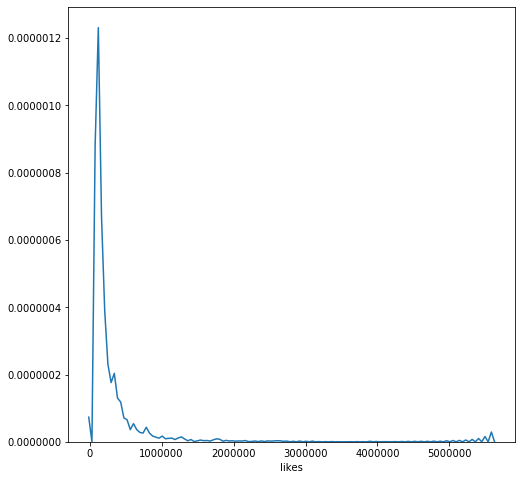

In [6]:
plt.figure(figsize = (8,8))
sns.distplot(youtube['likes'], hist = False)
# plt.axvline(np.median(youtube['likes']))

In [7]:
np.quantile(youtube['likes'], 0.25)

5424.0

In [8]:
Q1_like = youtube['likes'].describe()['25%']
Q3_like = youtube['likes'].describe()['75%']
IQR = Q3_like - Q1_like

In [9]:
youtube[(youtube['likes'] >= Q1_like - (1.5*IQR)) & (youtube['likes'] <= Q3_like + (1.5 * IQR))]['likes']

0        57527
1        97185
3        10172
5         9763
6        15993
         ...  
40940    46351
40941    45128
40944    38160
40945    60008
40946    48068
Name: likes, Length: 35813, dtype: int64

Text(0.5, 1.0, 'Not-Outlier Likes based on the IQR')

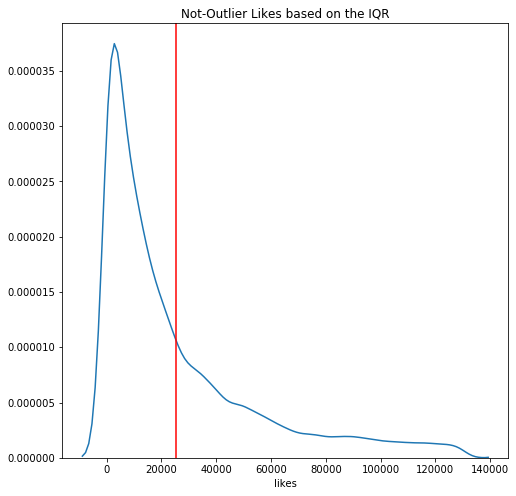

In [10]:
plt.figure(figsize = (8,8))
sns.distplot(youtube[(youtube['likes'] >= Q1_like - (1.5*IQR)) & (youtube['likes'] <= Q3_like + (1.5 * IQR))]['likes'],
             hist = False)
plt.axvline(np.mean(youtube[(youtube['likes'] >= Q1_like - (1.5*IQR)) & (youtube['likes'] <= Q3_like + (1.5 * IQR))]['likes']), 
            color = 'red')
plt.title('Not-Outlier Likes based on the IQR')

Text(0.5, 1.0, 'Not-outlier likes based on the Empirical rules')

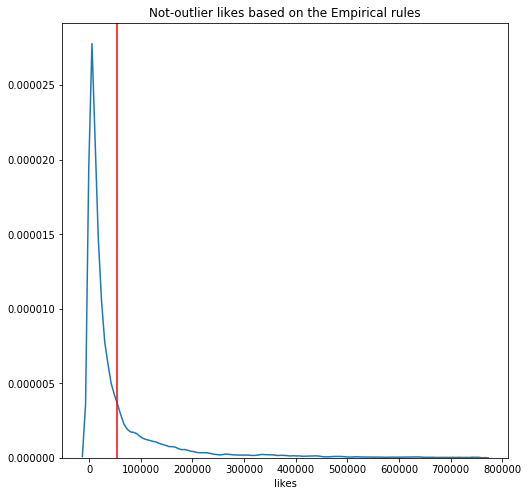

In [11]:
likes_std = youtube['likes'].std()
likes_mean = youtube['likes'].mean()
batas_atas = likes_mean + (likes_std * 3)
batas_bawah = likes_mean - (likes_std * 3)

plt.figure(figsize = (8,8))
sns.distplot(youtube[ (youtube['likes'] >= batas_bawah) & (youtube['likes'] <= batas_atas)]['likes'], hist = False)
plt.axvline(youtube[ (youtube['likes'] >= batas_bawah) & (youtube['likes'] <= batas_atas)]['likes'].mean(), color = 'red')
plt.title('Not-outlier likes based on the Empirical rules')

In [12]:
youtube[['likes', 'dislikes']].corr('spearman')

,likes,dislikes
likes,1.000000,0.798874
dislikes,0.798874,1.000000


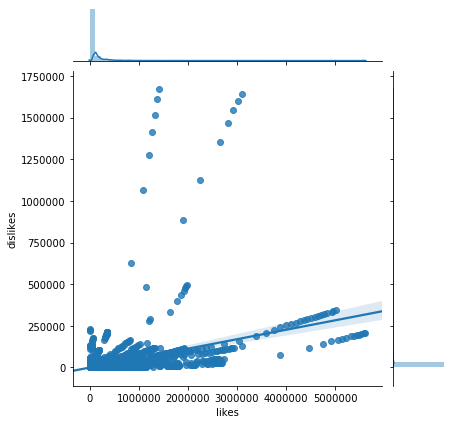

In [13]:
sns.jointplot(x = youtube['likes'], y = youtube['dislikes'], kind = 'reg')

In [14]:
import matplotlib._color_data as mcd

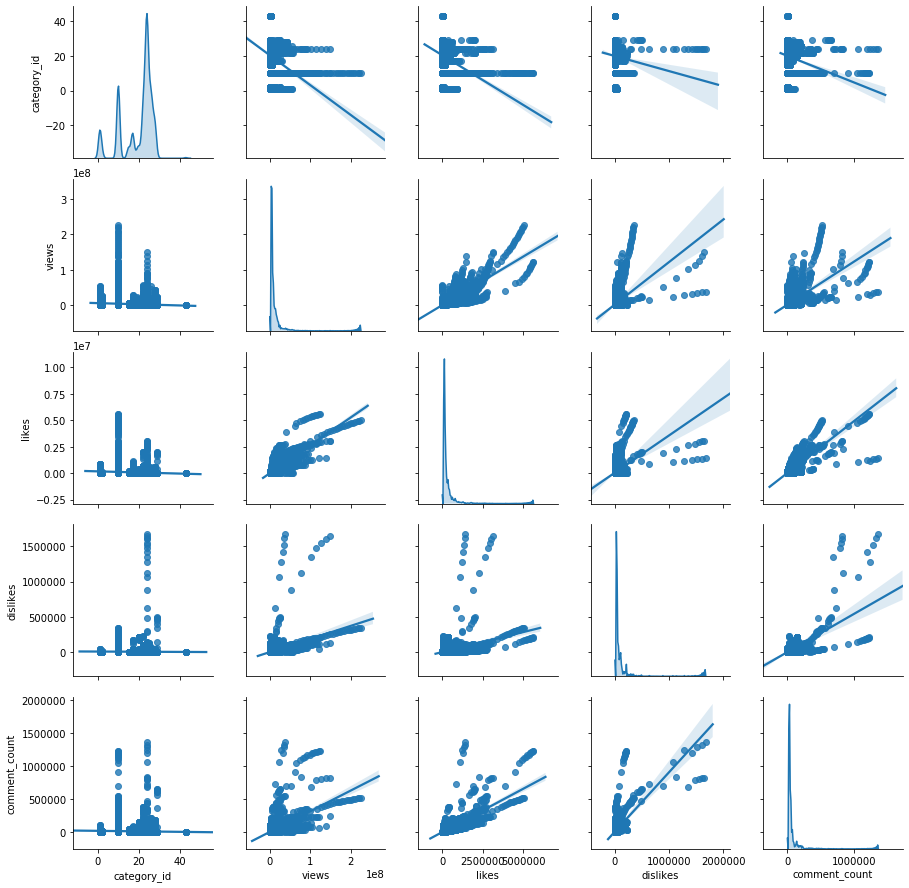

In [15]:
sns.pairplot(youtube.drop(['comments_disabled', 'ratings_disabled', 'video_error_or_removed'], axis = 1),
            palette = 'colorblind', kind = 'reg', diag_kind = 'kde')

In [16]:
youtube.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


## Categorical Plot

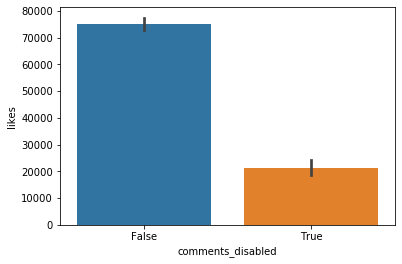

In [17]:
sns.barplot(x = 'comments_disabled', y = 'likes' , data = youtube)

In [18]:
import numpy as np

def make_bootstrap(n_size, n_boot, ci, data):
    mean_boot = []
    
    for i in range(n_boot):
        mean_boot.append(data.sample(n_size, replace = True).mean())
        
    level = 100*((1-ci)/2)
    upper_level = 100-level
    lower_level = 0+level
    
    return {'lower_conf_int': np.percentile(mean_boot, lower_level), 
            'upper_conf_int': np.percentile(mean_boot, upper_level)}

In [19]:
np.percentile(youtube[youtube['comments_disabled'] == False]['likes'], 97.5)

501965.125

In [20]:
make_bootstrap(len(youtube[youtube['comments_disabled'] == False]['likes']), 
               1000, 0.95, youtube[youtube['comments_disabled'] == False]['likes'] )

{'lower_conf_int': 72800.77915529815, 'upper_conf_int': 77560.72607773589}

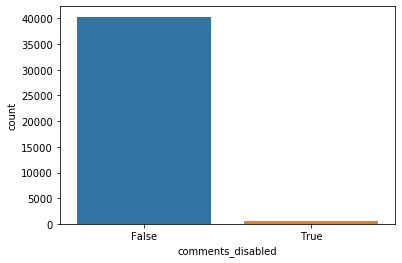

In [21]:
sns.countplot(data =youtube, x = 'comments_disabled')

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000001AD6EB94048> (for post_execute):


KeyboardInterrupt: 

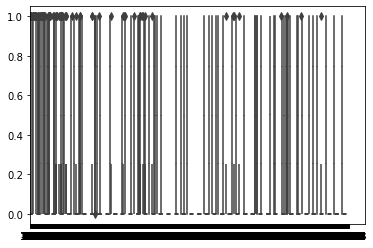

In [22]:
sns.boxplot(data = youtube, y = 'comments_disabled', x = 'likes', hue = 'ratings_disabled')

In [ ]:
plt.figure(figsize = (8,8))
sns.stripplot(data = youtube, x = 'comments_disabled', y = 'likes')
sns.violinplot(data = youtube, x = 'comments_disabled', y = 'likes')

In [23]:
tips = sns.load_dataset('tips')

In [24]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [25]:
tips.corr('pearson')

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


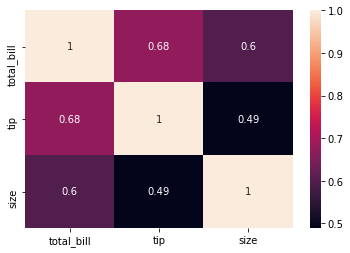

In [40]:
sns.heatmap(tips.corr('pearson'), annot = True)

In [27]:
flights = sns.load_dataset('flights')

In [28]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [29]:
pvflight = flights.pivot_table(values = 'passengers', index = 'month', columns = 'year')
pvflight

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


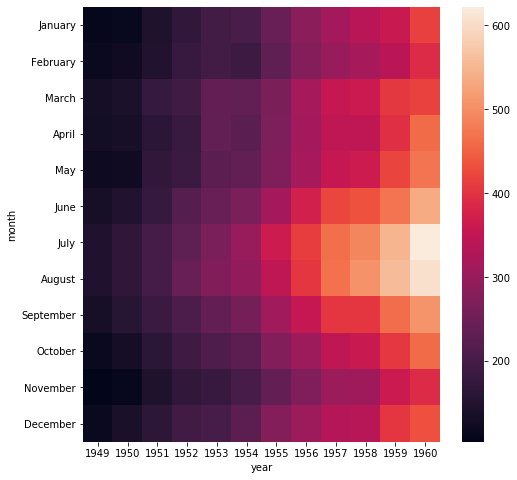

In [30]:
plt.figure(figsize = (8,8))
sns.heatmap(pvflight)

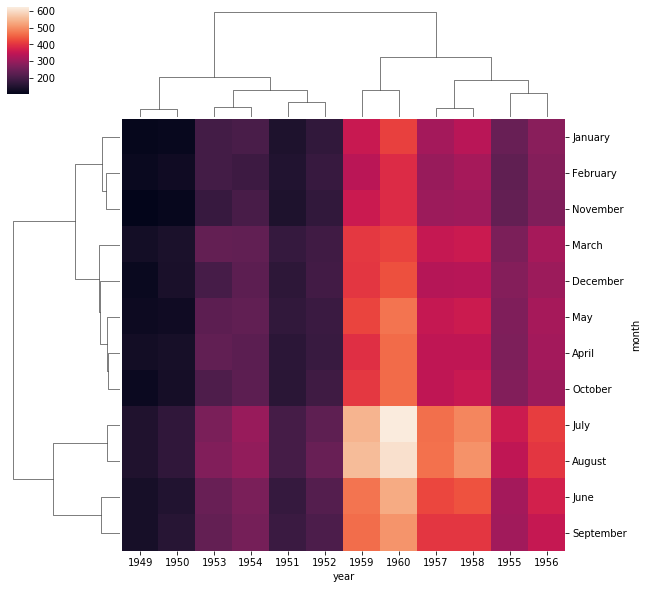

In [31]:
sns.clustermap(pvflight)

In [32]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


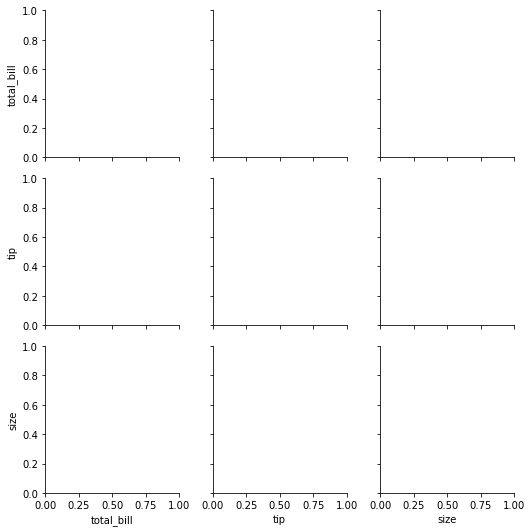

In [41]:
sns.PairGrid(tips)

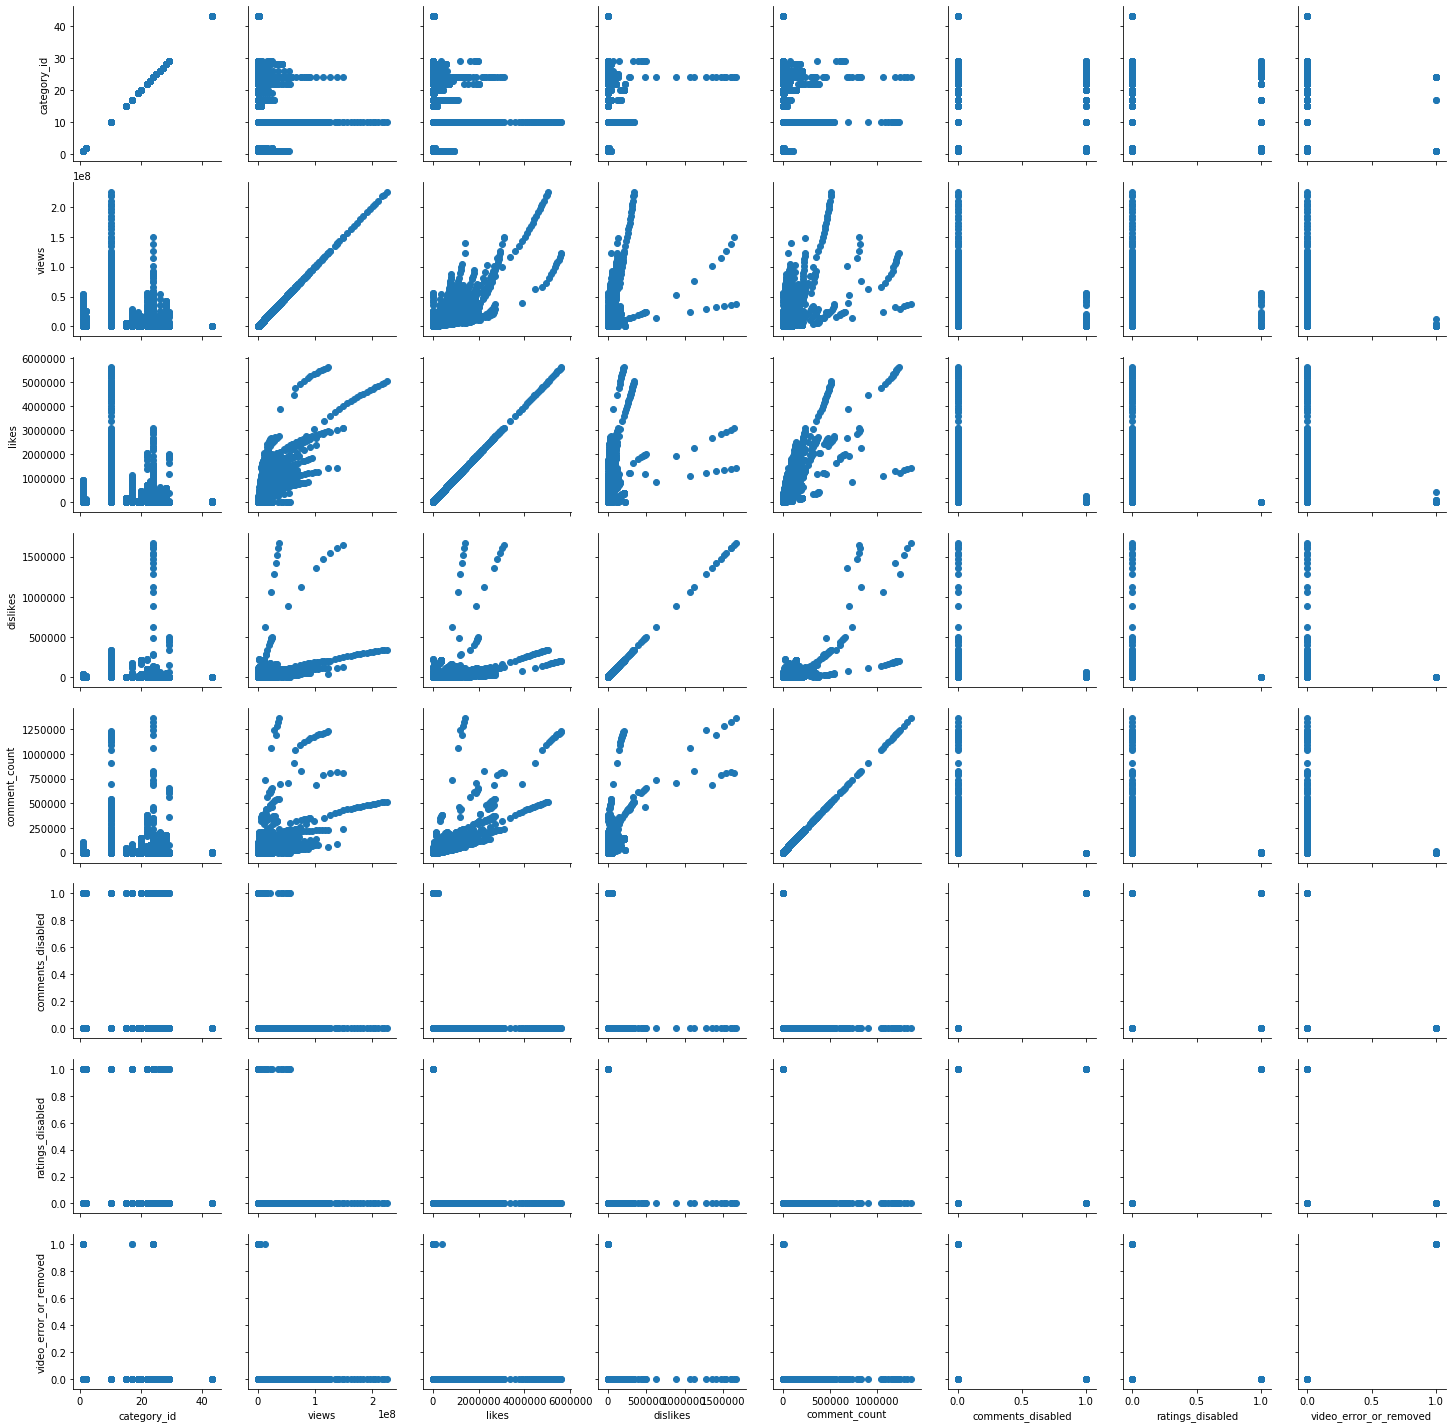

In [43]:
sns.PairGrid(youtube).map(plt.scatter)

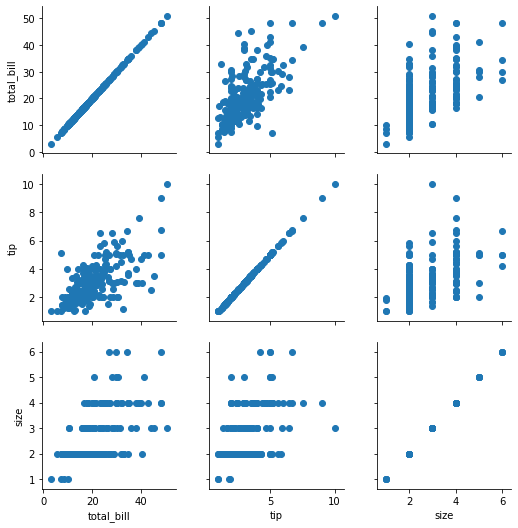

In [33]:
g = sns.PairGrid(tips)
g.map(plt.scatter)

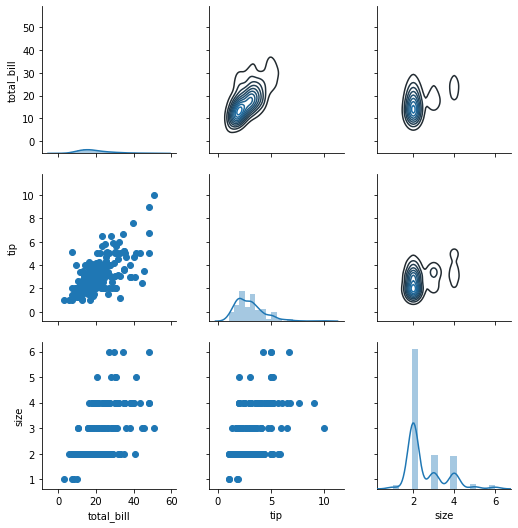

In [34]:
g = sns.PairGrid(tips)
g.map_diag(sns.distplot)
g.map_upper(sns.kdeplot)
g.map_lower(plt.scatter)

In [35]:
tips['time'].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

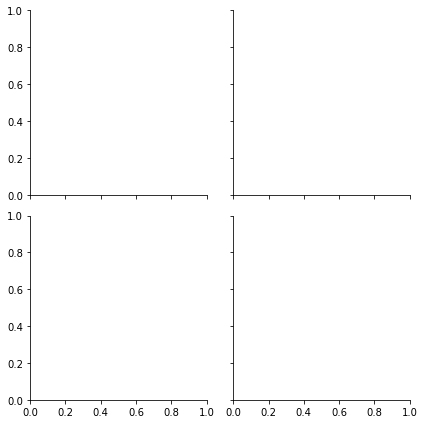

In [44]:
sns.FacetGrid(data = tips, col ='time', row = 'smoker', hue = 'sex')

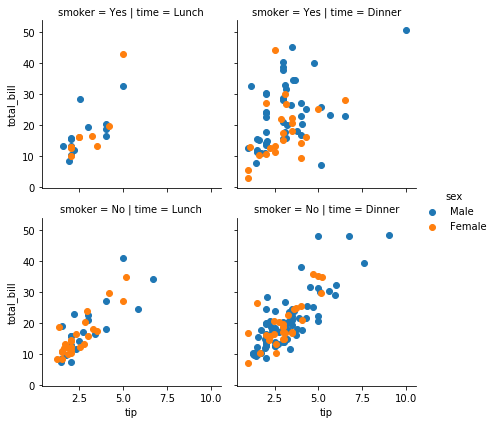

In [36]:
g = sns.FacetGrid(data = tips, col ='time', row = 'smoker', hue = 'sex')
g.map(plt.scatter, 'tip', 'total_bill').add_legend()

In [37]:
tips[(tips['smoker'] == 'No') & (tips['time'] == 'Dinner') & (tips['tip'] > 7.5)]

,total_bill,tip,sex,smoker,day,time,size
23,39.42,7.58,Male,No,Sat,Dinner,4
212,48.33,9.00,Male,No,Sat,Dinner,4


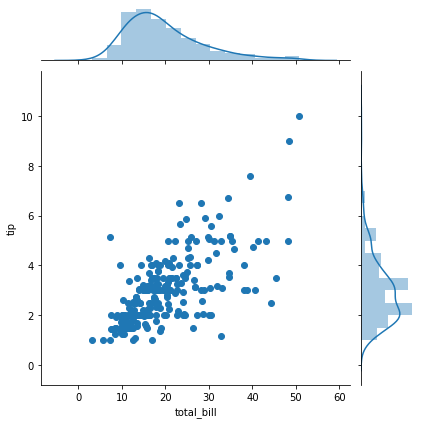

In [46]:
g = sns.JointGrid(x = 'total_bill', y = 'tip', data = tips)
g.plot(plt.scatter, sns.distplot)